In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/Sprint")

Missing Values:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


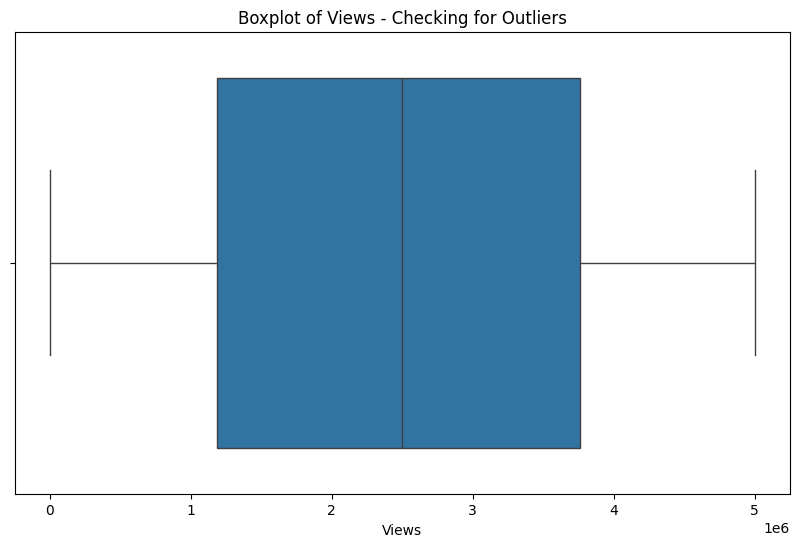

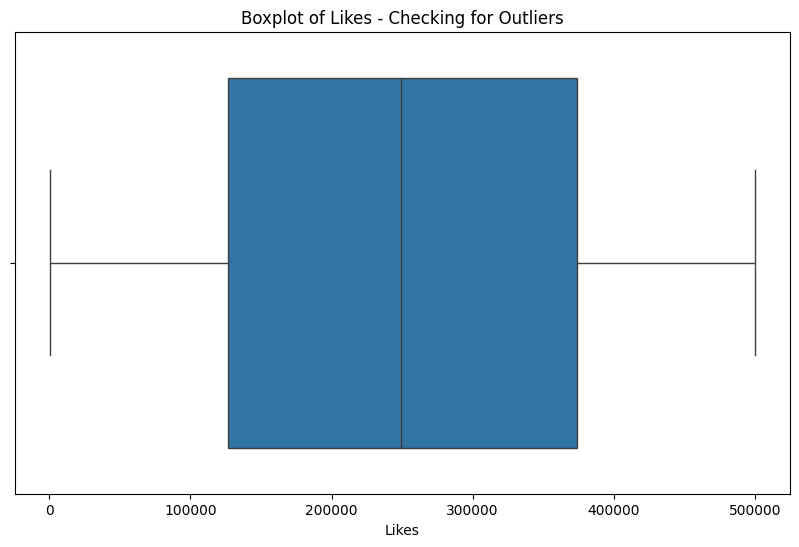

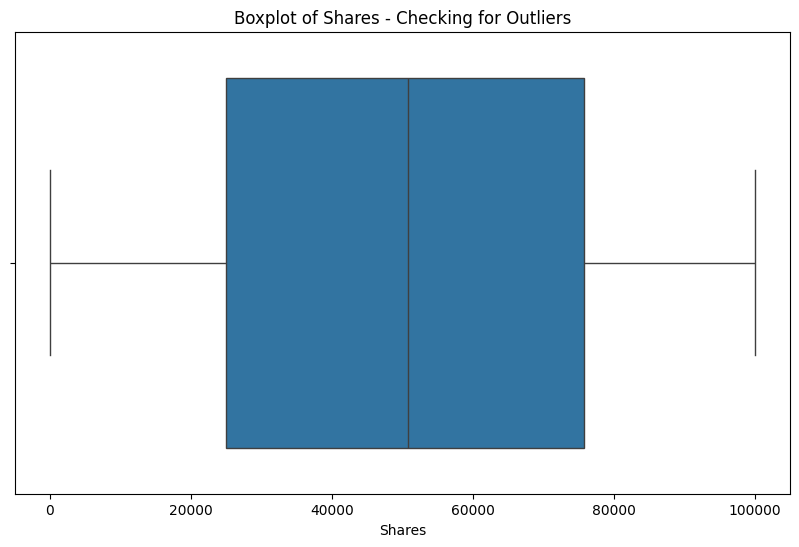

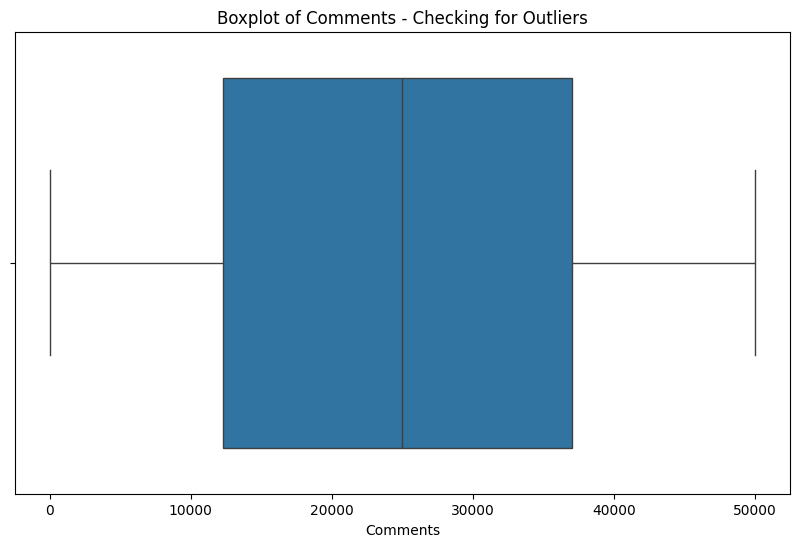

Outliers in Views: Series([], Name: Views, dtype: int64)
Outliers in Likes: Series([], Name: Likes, dtype: int64)
Unique values in Platform column: ['TikTok' 'Instagram' 'Twitter' 'YouTube']
Unique values in Hashtag column: ['#Challenge' '#Education' '#Dance' '#Comedy' '#Gaming' '#Music' '#Viral'
 '#Fitness' '#Tech' '#Fashion']
Unique values in Content_Type column: ['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']
Unique values in Engagement_Level column: ['High' 'Medium' 'Low']
Platform Counts: Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64
Engagement Level Distribution: Engagement_Level
Low       1729
High      1673
Medium    1598
Name: count, dtype: int64
Platform count distribution: Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64


In [5]:
df = pd.read_csv('Viral_Social_Media_Trends.csv')

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

df['Hashtag'] = df['Hashtag'].fillna('No Hashtag')
df['Views'] = df['Views'].fillna(df['Views'].median())
df['Likes'] = df['Likes'].fillna(df['Likes'].median())
df['Shares'] = df['Shares'].fillna(df['Shares'].median())
df['Comments'] = df['Comments'].fillna(df['Comments'].median())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Views'])
plt.title('Boxplot of Views - Checking for Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Likes'])
plt.title('Boxplot of Likes - Checking for Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Shares'])
plt.title('Boxplot of Shares - Checking for Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Comments'])
plt.title('Boxplot of Comments - Checking for Outliers')
plt.show()

def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

outliers_views = identify_outliers(df['Views'])
print(f"Outliers in Views: {outliers_views}")

outliers_likes = identify_outliers(df['Likes'])
print(f"Outliers in Likes: {outliers_likes}")

print("Unique values in Platform column:", df['Platform'].unique())
print("Unique values in Hashtag column:", df['Hashtag'].unique())
print("Unique values in Content_Type column:", df['Content_Type'].unique())
print("Unique values in Engagement_Level column:", df['Engagement_Level'].unique())

platform_values = df['Platform'].value_counts()
print("Platform Counts:", platform_values)

engagement_distribution = df['Engagement_Level'].value_counts()
print("Engagement Level Distribution:", engagement_distribution)

platform_count = df['Platform'].value_counts()
print("Platform count distribution:", platform_count)


In [6]:
print(df.head())


  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  


In [7]:
numerical_columns = ['Views', 'Likes', 'Shares', 'Comments']
descriptive_stats = df[numerical_columns].describe()

platform_counts = df['Platform'].value_counts()
hashtag_counts = df['Hashtag'].value_counts()
content_type_counts = df['Content_Type'].value_counts()
engagement_level_counts = df['Engagement_Level'].value_counts()

print(descriptive_stats)
print("Platform Counts:\n", platform_counts)
print("Hashtag Counts:\n", hashtag_counts)
print("Content Type Counts:\n", content_type_counts)
print("Engagement Level Counts:\n", engagement_level_counts)


              Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000
Platform Counts:
 Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64
Hashtag Counts:
 Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64
Content Type Counts:
 Content_Type
Live Stream    855
Post           853
Reel

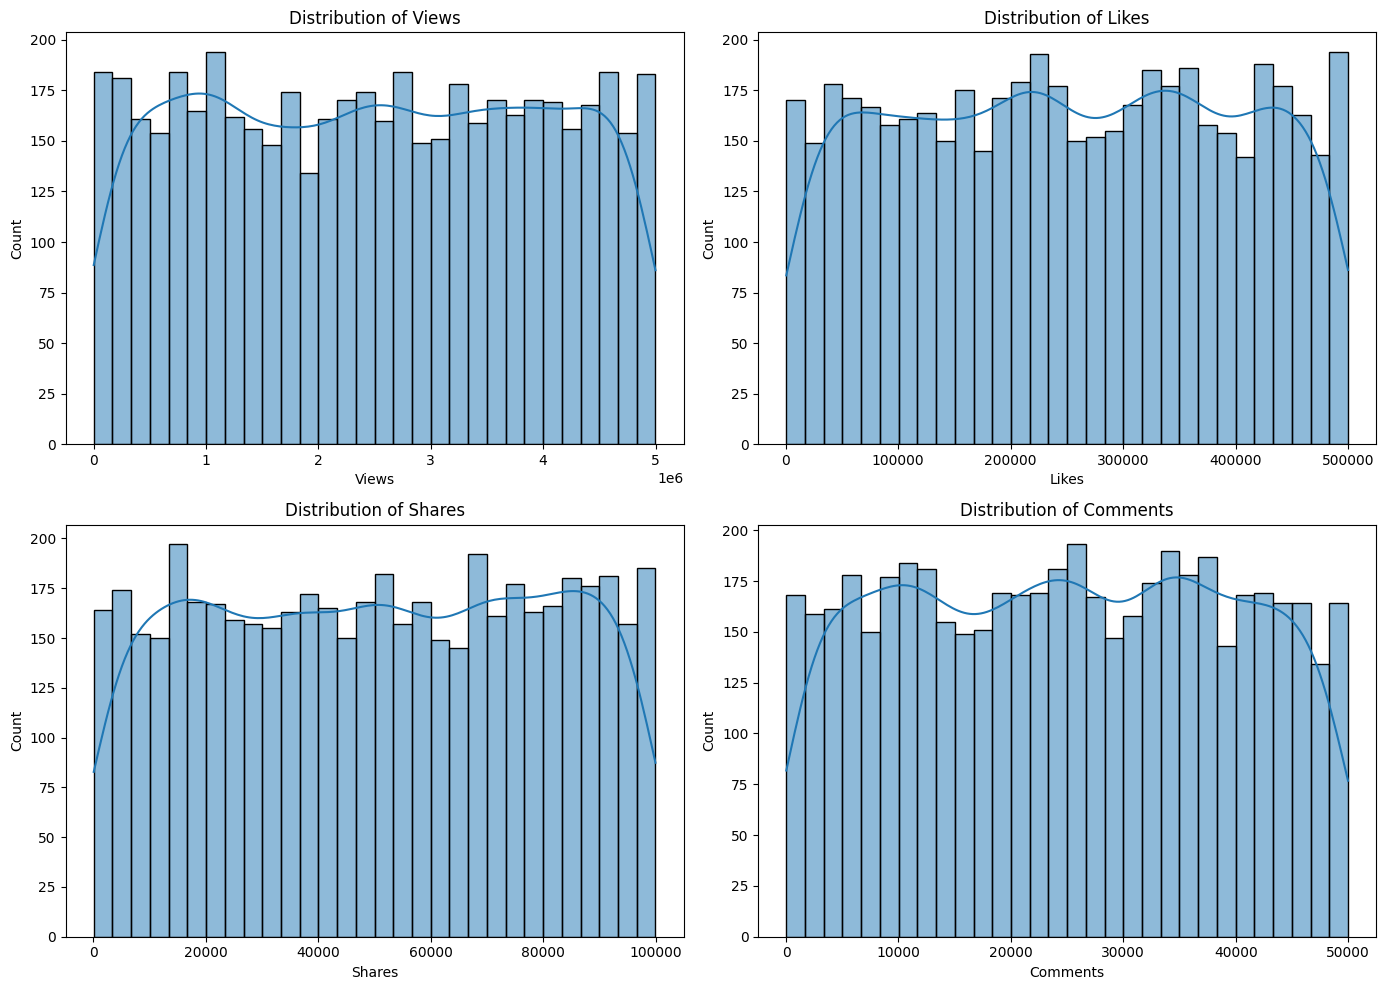

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Views'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Views')

sns.histplot(df['Likes'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Likes')

sns.histplot(df['Shares'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Shares')

sns.histplot(df['Comments'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Comments')

plt.tight_layout()
plt.show()


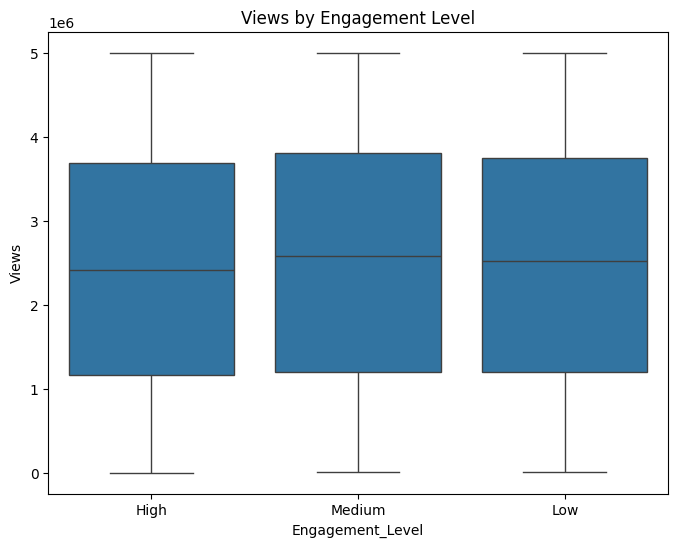

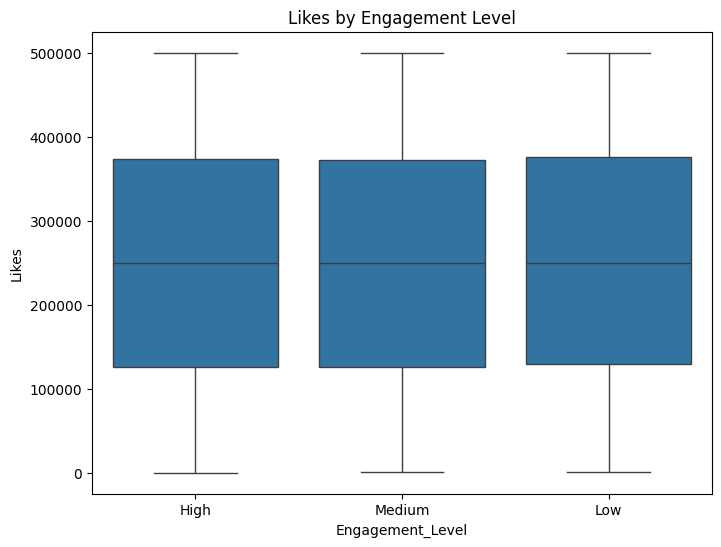

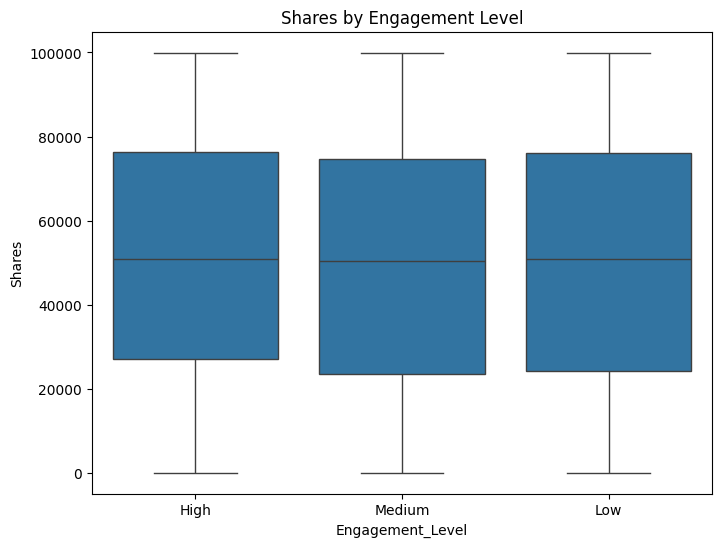

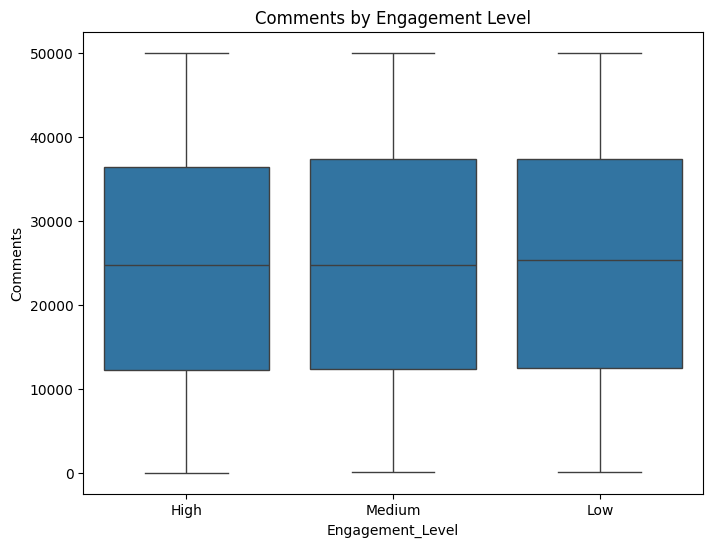

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engagement_Level', y='Views', data=df)
plt.title('Views by Engagement Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Engagement_Level', y='Likes', data=df)
plt.title('Likes by Engagement Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Engagement_Level', y='Shares', data=df)
plt.title('Shares by Engagement Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Engagement_Level', y='Comments', data=df)
plt.title('Comments by Engagement Level')
plt.show()


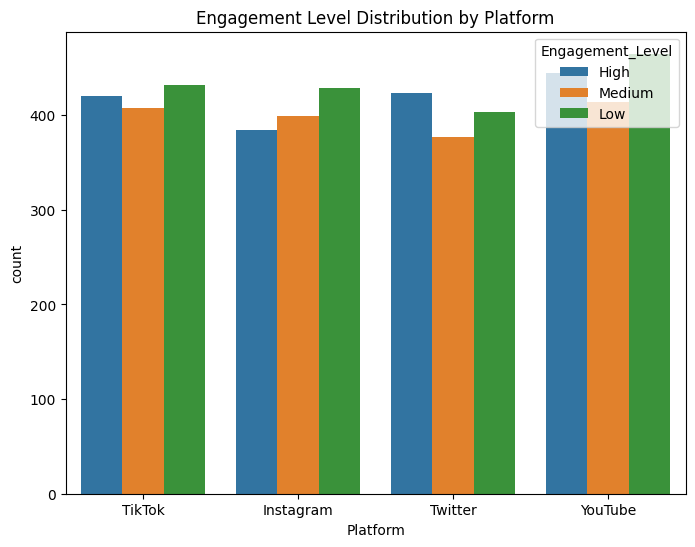

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Platform', hue='Engagement_Level', data=df)
plt.title('Engagement Level Distribution by Platform')
plt.show()


In [11]:
from scipy import stats

platform_groups = [df[df['Platform'] == platform]['Views'] for platform in df['Platform'].unique()]
anova_views = stats.f_oneway(*platform_groups)

anova_views


F_onewayResult(statistic=2.2020347811727197, pvalue=0.08571036406162057)

In [12]:
likes_groups = [df[df['Platform'] == platform]['Likes'] for platform in df['Platform'].unique()]
anova_likes = stats.f_oneway(*likes_groups)

anova_likes


F_onewayResult(statistic=3.2803358668797244, pvalue=0.020046671209763903)

In [13]:
shares_groups = [df[df['Platform'] == platform]['Shares'] for platform in df['Platform'].unique()]
anova_shares = stats.f_oneway(*shares_groups)

anova_shares


F_onewayResult(statistic=0.6126810144310522, pvalue=0.6067247961927071)

In [14]:
contingency_table = pd.crosstab(df['Platform'], df['Engagement_Level'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p_val


(3.8484846107497677, 0.6971718015472017)